In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
import dash

In [2]:
#loading data
crs_data = pd.read_csv("crs_data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87685 entries, 0 to 87684
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   donor_code             87667 non-null  float64
 1   donor_name             87685 non-null  object 
 2   recipient_code         87685 non-null  int64  
 3   recipient_name         87685 non-null  object 
 4   sector_code            87685 non-null  int64  
 5   sector_name            87685 non-null  object 
 6   measure_code           87685 non-null  int64  
 7   measure_name           87685 non-null  object 
 8   channel_code           87685 non-null  int64  
 9   channel_name           87685 non-null  object 
 10  flow_code              87685 non-null  object 
 11  flow_name              87685 non-null  object 
 12  flow_type_code         87685 non-null  object 
 13  flow_type_name         87685 non-null  object 
 14  data_type_code         87685 non-null  object 
 15  am

<Axes: >

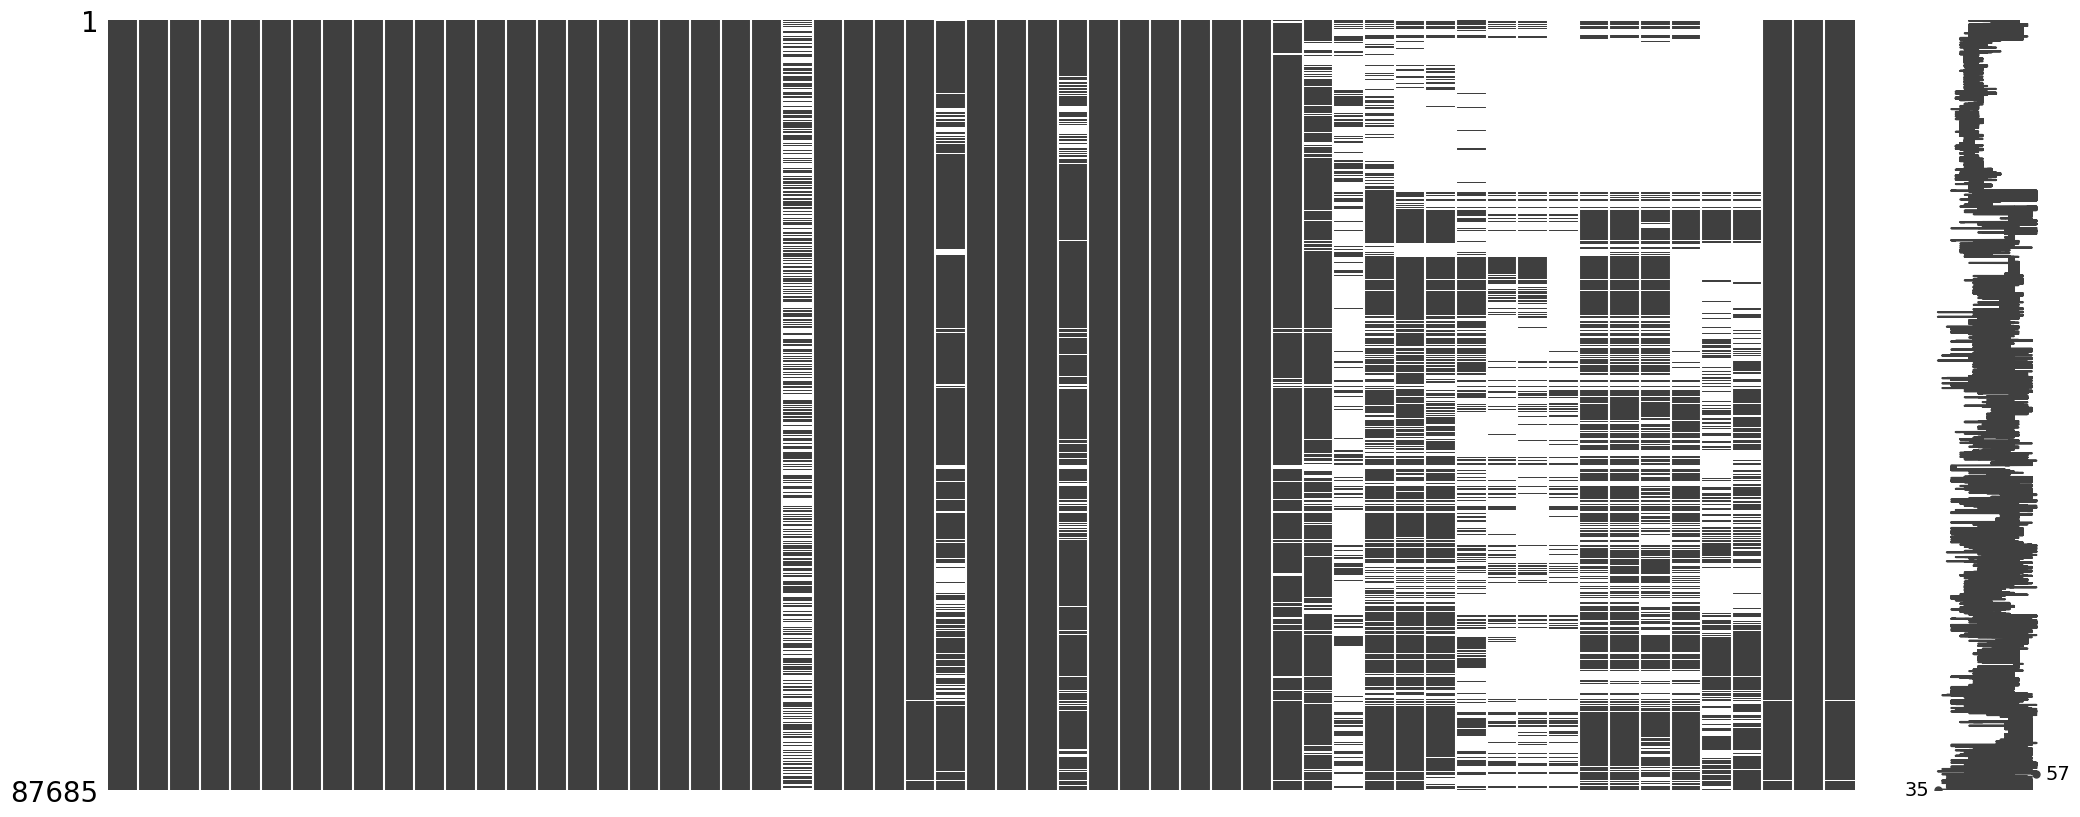

In [3]:
#understanding variables
#crs_data.head()
crs_data.info()

#missing values
msno.matrix(crs_data)

In [4]:
#figuring out what the unique donor names are, to categorise
#unique_donor_name = crs_data["donor_name"].unique()
#print(unique_donor_name)
#unique_donors.to_csv('unique_donors_250517.csv', index=False)

In [5]:
#Grouping donors into mutually exclusive categories - G7, BRICS, UN, World Bank, Other - etc

g7 = ["United Kingdom", 
      "United States", 
      "France", 
      "Germany", 
      "Italy", 
      "Canada", 
      "Japan"]

brics = ["Brazil", 
         "Russia", 
         "India",
         "China", 
         "South Africa"] # no BRIC countries currently in dataset

eu_institutions = ["EU Institutions"]

foundation = ["Wellcome Trust",
            "IKEA Foundation",
            "William and Flora Hewlett Foundation",
            "Jacobs Foundation",
            "German Postcode Lottery",
            "Open Society Foundations",
            "UBS Optimus Foundation",
            "Susan T. Buffett Foundation",
            "World Diabetes Foundation",
            "Gates Foundation",
            "Rockefeller Foundation",
            "Laudes Foundation",
            "H&M Foundation",
            "David and Lucile Packard Foundation",
            "LEGO Foundation",
            "Children's Investment Fund Foundation",
            "Conrad N. Hilton Foundation",
            "Ford Foundation",
            "Good Ventures Foundation",
            "Citi Foundation",
            "Bloomberg Family Foundation",
            "Arcadia Fund"
            ]

un_agency = ["International Centre for Genetic Engineering and Biotechnology [ICGEB]",
            "WFP",
            "United Nations Industrial Development Organization [UNIDO]",
            "UNICEF",
            "UNFPA",
            "UNHCR",
            "UNDP",
            "UNAIDS",
            "UN Women",
            "International Labour Organisation [ILO]",
            "Joint Sustainable Development Goals Fund [Joint SDG Fund]",
            "UN Development Coordination Office",
            "Food and Agriculture Organisation [FAO]",
            "International Atomic Energy Agency [IAEA]",
            "Central Emergency Response Fund [CERF]",
            "IFAD",
            "COVID-19 Response and Recovery Multi-Partner Trust Fund [UN COVID-19 MPTF]"
            ]

world_bank = ["International Development Association [IDA]",
              "International Bank for Reconstruction and Development [IBRD]"]

other_dfi_ifi_bank = ["OPEC Fund for International Development [OPEC Fund]",
                "Global Fund",
                "Green Climate Fund [GCF]"
                "Private Infrastructure Development Group",
                "Global Environment Facility [GEF]",
                "Adaptation Fund",
                "Nordic Development Fund [NDF]",
                "Islamic Development Bank [IsDB]",
                "Asian Infrastructure Investment Bank [AIIB]",
                "Asian Development Bank [AsDB]",
                "IMF Concessional Trust Funds"
                ]

other_igo_ngo_ppp = ["World Health Organisation [WHO]",
                "World Trade Organisation",
                "WTO - International Trade Centre [ITC]",
                "WHO-Strategic Preparedness and Response Plan [SPRP]",
                "Global Alliance for Vaccines and Immunization [GAVI]"
                ]

other_country = ["Australia",
            "Austria",
            "Azerbaijan",
            "Belgium",
            "Bulgaria",
            "Croatia",
            "Czechia",
            "Denmark",
            "Estonia",
            "Finland",
            "Greece",
            "Hungary",
            "Iceland",
            "Ireland",
            "Israel",
            "Kazakhstan",
            "Korea",
            "Kuwait",
            "Latvia",
            "Liechtenstein",
            "Lithuania",
            "Luxembourg",
            "Malta",
            "Netherlands",
            "New Zealand",
            "Norway",
            "Poland",
            "Portugal",
            "Qatar",
            "Romania",
            "Saudi Arabia",
            "Slovak Republic",
            "Slovenia",
            "Spain",
            "Sweden",
            "Switzerland",
            "Türkiye",
            "Thailand",
            "United Arab Emirates"
]



In [6]:
# define function to apply donor grouping
def donor_group_function (donor):
    if donor in g7:
        return "G7"
    elif donor in brics:
        return "BRICS"
    elif donor in eu_institutions:
        return "EU Institutions"
    elif donor in foundation:
        return "Foundation"
    elif donor in un_agency:
        return "UN Agencies"
    elif donor in world_bank:
        return "World Bank"
    elif donor in other_country:
        return "Other - Country"
    elif donor in other_dfi_ifi_bank:
        return "Other - DFI, IFI, Bank"
    else:
        return "Other - IGO, NGO, PPP"
    
#apply function crs_data to a new variable called 'donor group'
crs_data["donor_group"] = crs_data["donor_name"].apply(donor_group_function)

In [7]:
#grouping dataset, calculating sum and rounding to billion - for charts
crs_grouped = crs_data.groupby(['year','donor_group'], as_index=False)['value'].sum()
crs_grouped["value_bn"] = crs_grouped["value"] / 1000
crs_grouped["value_bn_rounded"] = crs_grouped["value_bn"].round(2)

crs_grouped.head()

,year,donor_group,value,value_bn,value_bn_rounded
0,2002,G7,4361.032566,4.361033,4.36
1,2002,Other - Country,131.898886,0.131899,0.13
2,2002,"Other - DFI, IFI, Bank",859.946212,0.859946,0.86
3,2002,UN Agencies,39.043041,0.039043,0.04
4,2002,World Bank,2443.378006,2.443378,2.44


#### EXPLORING VISUALISATIONS WITH PLOTLY EXPRESS

In [8]:
grouped_dg =crs_grouped["donor_group"].unique()
donor_dropdown_options = [
    {"label": "All Donors", "method": "update", "args": [{"visible": [True] * len(crs_grouped)}, {}]}
]
for donor in grouped_dg:
    visibility = [True if donor == group else False for group in list(crs_grouped["donor_group"].unique())]
    donor_dropdown_options.append(
        {"label": donor, "method": "update", "args": [{"visible": visibility}, {}]}
    )
fig = px.bar(
    crs_grouped,
    x="year",
    y="value_bn_rounded",
    color="donor_group",   # This separates the stacks by donor
    text_auto=True,       # Optional: shows values on bars
    title="ODA flows to Pakistan by year and donor group",
    labels={
        "year": "Year",
        "value_bn_rounded": "ODA disbursement ($billion)",
        "donor_group": "Donor Group"
    },
    color_discrete_sequence=px.colors.qualitative.Safe  # Optional: choose nice colors
)

# Customize the layout a bit
fig.update_layout(
        updatemenus=[{
        "buttons": donor_dropdown_options,
        "direction": "down",
        "showactive": True,
        "x": 1.12,  
        "y": 1.2,  
        "xanchor": "center",
        "yanchor": "top"
    }],

    barmode="stack",  # Stack the bars
    title_font=dict(family="Arial", size=16),
    xaxis_title_font=dict(family="Arial", size=12),
    yaxis_title_font=dict(family="Arial", size=12),
    legend_title="Donor",
    template="plotly_white"
)

fig.show()

### definitely need to recategorise donor names, grouping roughly as follows:
# multilaterals: ADB, WB(IDA & IBRD), UN agencies, EU institution
# bilterals: USA, UK, France, Germany, Australia, Japan, Saudi, 'other'

In [9]:
print(crs_grouped)

crs_grouped.to_csv('crs_grouped.csv', index=False)

     year             donor_group        value  value_bn  value_bn_rounded
0    2002                      G7  4361.032566  4.361033              4.36
1    2002         Other - Country   131.898886  0.131899              0.13
2    2002  Other - DFI, IFI, Bank   859.946212  0.859946              0.86
3    2002             UN Agencies    39.043041  0.039043              0.04
4    2002              World Bank  2443.378006  2.443378              2.44
..    ...                     ...          ...       ...               ...
157  2023         Other - Country  4399.147195  4.399147              4.40
158  2023  Other - DFI, IFI, Bank  3433.931436  3.433931              3.43
159  2023   Other - IGO, NGO, PPP   173.945602  0.173946              0.17
160  2023             UN Agencies   230.125440  0.230125              0.23
161  2023              World Bank  5123.220960  5.123221              5.12

[162 rows x 5 columns]


Bar Chart by Sector-Name and additonal column added in CRS_Data

In [10]:
# Clean column names
#crs_data.columns = crs_data.columns.str.strip()
#sector_category.columns = sector_category.columns.str.strip()

#Convert 'value' from million to billion
crs_data["value"] = crs_data["value"] / 1000  # 1,000 million = 1 billion
#print(crs_data.columns)


In [11]:
# Group by year and sector-group, sum the values
grouped = crs_data.groupby(["year", "sector-group"], as_index=False)["value"].sum()

# Rename columns for clarity
grouped.columns = ["year", "sector_group", "total_value"]

# Ensure year is treated as a category for better bar spacing
grouped["year"] = grouped["year"].astype(str)

# Create bar chart
fig = px.bar(
    grouped,
    x="year",
    y="total_value",
    color="sector_group",
    text="total_value",  # Show actual values on bars
    title="ODA Budget to Pakistan by Year and Sector Group (in Billions)",
    labels={
        "year": "Year",
        "total_value": "ODA Disbursement ($Billion)",
        "sector_group": "Sector Group"
    },
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Customize layout
fig.update_layout(
    barmode="stack",
    title_font=dict(family="Arial", size=16),
    xaxis_title_font=dict(family="Arial", size=12),
    yaxis_title_font=dict(family="Arial", size=12),
    legend_title="Sector Group",
    template="plotly_white"
)

# format the bar labels for better readability
fig.update_traces(texttemplate='%{text:.2f}', textposition='inside')

fig.show()

In [12]:
# Add dropdown filter for sector groups
sector_groups = grouped["sector_group"].unique()
years = grouped["year"].unique()

# Dropdown options for sector groups
sector_dropdown_options = [
    {"label": "All Sectors", "method": "update", "args": [{"visible": [True] * len(grouped)}, {}]}
]
for sector in sector_groups:
    visibility = [True if group == sector else False for group in list(grouped["sector_group"].unique())]
    sector_dropdown_options.append(
        {"label": sector, "method": "update", "args": [{"visible": visibility}, {}]}
    )
# Dropdown options for years
year_dropdown_options = [
    {"label": "All Years", "method": "update", "args": [{"visible": [True] * len(grouped)}, {}]}
]
for year in years:
    visibility = [True if y == year else False for y in grouped["year"]]
    year_dropdown_options.append(
        {"label": year, "method": "update", "args": [{"visible": visibility}, {}]}
    )

# Add both dropdown filters to layout


fig.update_layout(
    updatemenus=[{
            "buttons": sector_dropdown_options,
            "direction": "down",
            "showactive": True,
            "x": 1,  # Position sector filter at top-left
            "y": 1.2,
            "xanchor": "center",
            "yanchor": "top",
            "name": "Sector Group"
        },
        {
            "buttons": year_dropdown_options,
            "direction": "down",
            "showactive": True,
            "x": 1.35,  # Position year filter at top-right
                        "y": 1.2,
            "xanchor": "center",
            "yanchor": "top",
            "name": "Year"
        }

],
    barmode="stack",
    title_font=dict(family="Arial", size=16),
    xaxis_title_font=dict(family="Arial", size=12),
    yaxis_title_font=dict(family="Arial", size=12),
    legend_title="Sector Group",
    template="plotly_white"
)

# Format bar labels for readability
fig.update_traces(texttemplate='%{text:.2f}', textposition='inside')

# Show figure
fig.show()

In [13]:
# calculations for the line chart (sum of ODA flows for each year)

crs_sums_yr = crs_grouped.groupby(['year'], as_index=False)['value_bn_rounded'].sum()
crs_sums_yr.head

<bound method NDFrame.head of     year  value_bn_rounded
0   2002              7.83
1   2003              6.54
2   2004              3.28
3   2005              4.04
4   2006              5.25
5   2007              5.09
6   2008              2.97
7   2009              6.51
8   2010              8.90
9   2011              9.87
10  2012              7.68
11  2013              7.83
12  2014             10.49
13  2015             10.88
14  2016             10.60
15  2017             10.68
16  2018              7.69
17  2019             11.03
18  2020             12.84
19  2021             13.19
20  2022             13.50
21  2023             15.31>

In [14]:
#create line chart showing ODA disbursements over time (fig_line)
fig_line = px.line(
    crs_sums_yr,
    x="year",
    y="value_bn_rounded",
    title="ODA flows to Pakistan over time",
    labels={
        "year": "Year",
        "value_bn_rounded": "ODA disbursement ($billion)"
    }
)

fig_line.show()

In [16]:
# Draw a treemap chart showing ODA flows by donor group and country, using crs_data spreadsheet

fig_treemap = px.treemap(
    crs_data,
    path=[px.Constant("Pakistan Donors"), 'donor_group', 'donor_name'],
    values='value',
    hover_data=['donor_group'],
    title="ODA flows to Pakistan by donor group, 2002 - 2023",
    #standardise font size for better readability
    
)

fig_treemap.update_layout(margin=dict(t=50, l=25, r=25, b=25),
                           font=dict(
        family='Arial, monospace',  # or 'Arial', 'Roboto', etc.
        size=16,                          # adjust font size
        color='black'                     # label color
    )
)

fig_treemap.show()